## xarray画图叠加地图
**19 Febrary 2020 by MiniUFO**

---
[TOC]

---
### 1. 问题
用了python的[`xarray`](http://xarray.pydata.org/en/stable/)包后，特别喜欢它的数据接口。除了可以切片，[`dask`](https://dask.org/)缓存、并行，还可以直接画图，这得益于它的数据结构将坐标和数据的深度绑定。例如打开教学数据即可画图：

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...


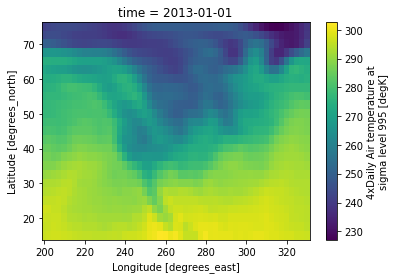

In [9]:
import xarray as xr

dset = xr.tutorial.open_dataset('air_temperature')

print(dset)

air2D = dset.air[0]
air2D.plot()

不得不承认确实很方便。但我以前使用的是气象画图软件[GrADS/OpenGrADS](http://www.opengrads.org/)，它默认数据都是经纬网格加上垂直层次、时间、变量，因此只要是二维平面图，就自动加地图上去，非常智能。[`xarray`](http://xarray.pydata.org/en/stable/)因为并不是面对气象类数据，所以这方面深度绑定得不够，想要叠加地图（如利用[`cartopy`](https://pypi.org/project/Cartopy/)）要写不少代码（反正不是一句话搞定就叫不少代码）。

---

### 2. 解决方法
我已经习惯了[GrADS/OpenGrADS](http://www.opengrads.org/)的`'d air'`一个命令来画一张有地图的温度平面图，所以自己写了个函数`plot_with_map`来实现（放在[PlotUtils.py]()里面）：

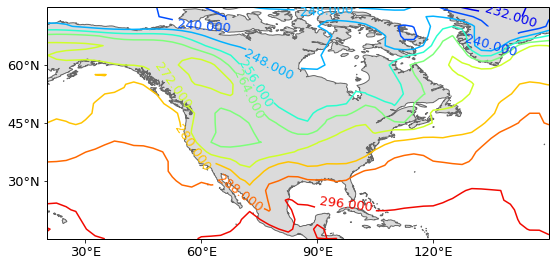

In [10]:
import sys
sys.path.append('d:/Python/MITgcm/')
from utils.PlotUtils import plot_with_map

plot_with_map(air2D)

最简单的用法就是提供一个水平二维的[`xarray`](http://xarray.pydata.org/en/stable/)变量即可。跟[GrADS/OpenGrADS](http://www.opengrads.org/)一样，默认是等值线图，可以修改画图类型：

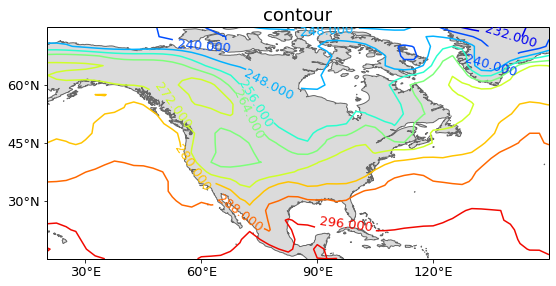

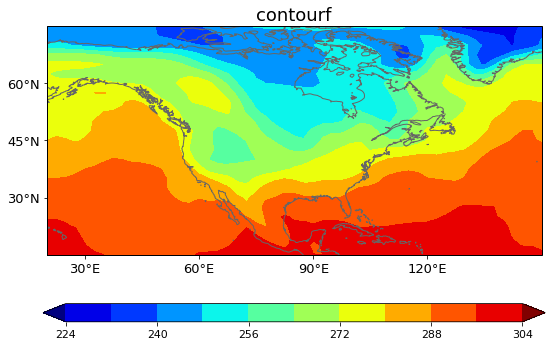

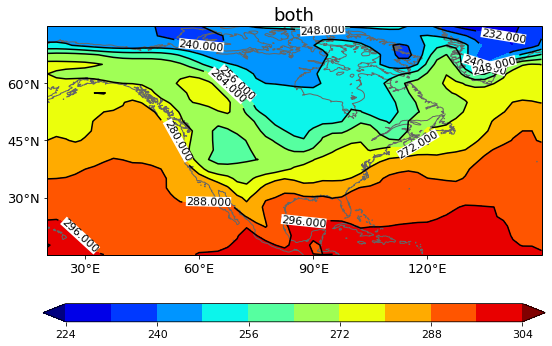

In [11]:
plot_with_map(air2D, ptype='contour', title='contour')
plot_with_map(air2D, ptype='contourf', title='contourf')
plot_with_map(air2D, ptype='both', title='both')

与[GrADS/OpenGrADS](http://www.opengrads.org/)相比，就是等值线的标注值经常是斜的，而[GrADS/OpenGrADS](http://www.opengrads.org/)一般在等值线导数为0（平行于x轴）的地方标注，有些地方看不清，其他地方还是很不错的。此外，还可以更换`colormap`：

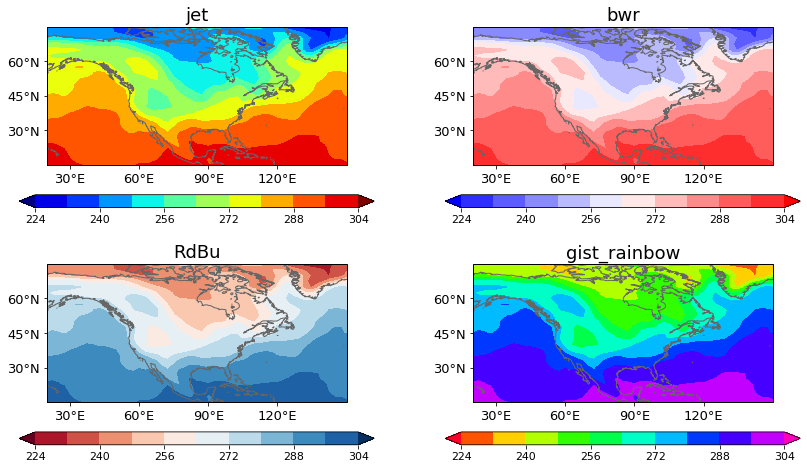

In [12]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# it is important to provide 'central_longitude=180' keyword arg to PlateCarree()
# if no the lon should be in [-180, 180], else lon is in [0, 360]
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14, 8),
                       subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)})

plot_with_map(air2D, ax=ax[0,0], ptype='contourf', cmap='jet', title='jet')
plot_with_map(air2D, ax=ax[0,1], ptype='contourf', cmap='bwr', title='bwr')
plot_with_map(air2D, ax=ax[1,0], ptype='contourf', cmap='RdBu', title='RdBu')
plot_with_map(air2D, ax=ax[1,1], ptype='contourf', cmap='gist_rainbow', title='gist_rainbow')

[GrADS/OpenGrADS](http://www.opengrads.org/)还有一个我挺喜欢的功能是maskout某一段颜色，比如画异常场的时候经常把0值附近的颜色maskout掉（变为白色，和背景一样），并且colorbar也同样maskout，现在这个功能也实现了：

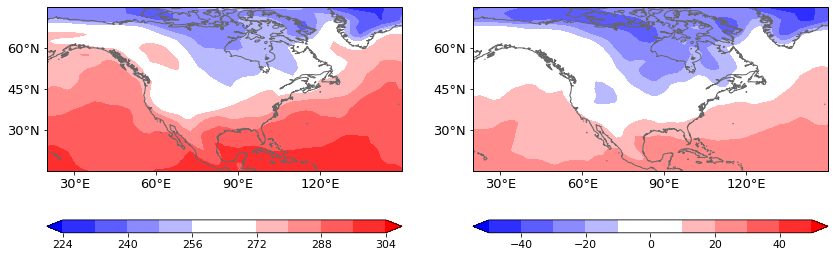

In [13]:
import numpy as np

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6),
                       subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)})

airC = air2D - 273.15

plot_with_map(air2D, ax=ax[0], ptype='contourf', cmap='bwr',
              maskout=[256, 272], clevs=np.linspace(224, 304, 11))
plot_with_map(airC , ax=ax[1], ptype='contourf', cmap='bwr',
              maskout=[-10,10], clevs=np.linspace(-50, 50, 11))

### References
[https://scitools.org.uk/cartopy/docs/latest/](https://scitools.org.uk/cartopy/docs/latest/)

[http://xarray.pydata.org/en/stable/](http://xarray.pydata.org/en/stable/)

[https://matplotlib.org/](https://matplotlib.org/)